# Validation

## Installing and importing modules

In [2]:
pip install pandas matplotlib seaborn xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


## Read the dataset

In [48]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [49]:
print(os.path.exists("prepared_dataset.csv"))

True


In [50]:
ds = pd.read_csv("prepared_dataset.csv")

## Modelling and Validation

### Define target and features columns

In [51]:
y_column = ['Status']  # target variable
X_columns = [
    'loan_limit', 'approv_in_adv', 'Credit_Worthiness',
    'business_or_commercial', 'Neg_ammortization', 'interest_only',
    'lump_sum_payment', 'construction_type', 'income',
    'co-applicant_credit_type', 'age', 'submission_of_application',
    'loan_type_type2', 'loan_type_type3', 'occupancy_type_pr',
    'credit_type_EQUI'
]
X = ds[X_columns]
y = ds[y_column]

### Визначення розподілу Train-Valid-Test
Розподіл Train-Valid-Test — це техніка для оцінки продуктивності вашої моделі машинного навчання, будь то класифікація чи регресія. Ви берете наявний набір даних і розділяєте його на три підмножини. Короткий опис ролі кожного з цих наборів даних наведений нижче.

#### Навчальний набір даних (Train Dataset)
Набір даних, що використовується для навчання моделі, тобто для налаштування параметрів моделі машинного навчання.

#### Валідаційний набір даних (Valid Dataset)
Набір даних, що використовується для надання неупередженої оцінки моделі, яка була навчена на навчальному наборі даних, під час налаштування гіперпараметрів моделі. Також відіграє роль в інших формах підготовки моделі, таких як вибір ознак, вибір порогу відсічення.

#### Тестовий набір даних (Test Dataset)
Набір даних, що використовується для надання неупередженої оцінки остаточної моделі, яка була навчена на навчальному наборі даних.

Валідаційний набір даних — це вибірка даних, яку тримають окремо від навчання моделі і використовують для оцінки навичок моделі під час налаштування її гіперпараметрів.

Валідаційний набір даних відрізняється від тестового набору даних, який також утримується окремо від навчання моделі, але використовується для надання неупередженої оцінки навичок фінальної налаштованої моделі під час порівняння або вибору між фінальними моделями.

In [52]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(115452, 16)
(115452, 1)
(14432, 16)
(14432, 1)
(14432, 16)
(14432, 1)


In [53]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [54]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

In [55]:
classifiers = dict()
for name, model in models.items():
    print('training ',name)
    classifier = model
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print('test set metrics: ', metrics.classification_report(y_test, y_pred))
    y_pred = classifier.predict(X_valid)
    print('validation set metrics: ', metrics.classification_report(y_valid, y_pred))
    classifiers[name] = classifier


training  RandomForestClassifier


c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


test set metrics:                precision    recall  f1-score   support

           0       0.87      0.94      0.90     10894
           1       0.75      0.55      0.64      3538

    accuracy                           0.85     14432
   macro avg       0.81      0.75      0.77     14432
weighted avg       0.84      0.85      0.84     14432

validation set metrics:                precision    recall  f1-score   support

           0       0.86      0.94      0.90     10851
           1       0.75      0.54      0.63      3581

    accuracy                           0.84     14432
   macro avg       0.80      0.74      0.76     14432
weighted avg       0.83      0.84      0.83     14432

training  GradientBoostingClassifier


c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test set metrics:                precision    recall  f1-score   support

           0       0.86      0.99      0.92     10894
           1       0.94      0.51      0.66      3538

    accuracy                           0.87     14432
   macro avg       0.90      0.75      0.79     14432
weighted avg       0.88      0.87      0.86     14432

validation set metrics:                precision    recall  f1-score   support

           0       0.86      0.99      0.92     10851
           1       0.95      0.50      0.66      3581

    accuracy                           0.87     14432
   macro avg       0.91      0.75      0.79     14432
weighted avg       0.88      0.87      0.86     14432



### K-fold validation

Перехресна перевірка K-fold.
Щоб мінімізувати упередженість вибірки, ми можемо замість того, щоб робити єдиний поділ, зробити багато розділень і перевірятимемо модель на всіх комбінаціях цих поділів.

Перевагою є те, що всі приклади використовуються як для навчання, так і для перевірки, і кожен приклад використовується один раз для перевірки. Ми зазвичай вибираємо або i = 5, або k = 10, оскільки вони знаходять хороший баланс між обчислювальною складністю та точністю перевірки.

In [56]:
from numpy import array
from sklearn.model_selection import KFold


# split train/test data
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)


# prepare cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# enumerate splits
for train, test in kfold.split(X_train):
    classifier = GradientBoostingClassifier()
    classifier.fit(X_train.iloc[train], y_train.iloc[train])
    y_pred = classifier.predict(X_train.iloc[test])
    print('k-fold set metrics: ', metrics.classification_report(y_train.iloc[test], y_pred))

y_pred = classifier.predict(X_test)    
print('test set metrics: ', metrics.classification_report(y_test, y_pred))


c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


k-fold set metrics:                precision    recall  f1-score   support

           0       0.86      0.99      0.92     17370
           1       0.95      0.51      0.67      5721

    accuracy                           0.87     23091
   macro avg       0.90      0.75      0.79     23091
weighted avg       0.88      0.87      0.86     23091



c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


k-fold set metrics:                precision    recall  f1-score   support

           0       0.86      0.99      0.92     17402
           1       0.95      0.50      0.66      5689

    accuracy                           0.87     23091
   macro avg       0.90      0.75      0.79     23091
weighted avg       0.88      0.87      0.86     23091



c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


k-fold set metrics:                precision    recall  f1-score   support

           0       0.86      0.99      0.92     17354
           1       0.95      0.51      0.66      5736

    accuracy                           0.87     23090
   macro avg       0.90      0.75      0.79     23090
weighted avg       0.88      0.87      0.86     23090



c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


k-fold set metrics:                precision    recall  f1-score   support

           0       0.86      0.99      0.92     17446
           1       0.95      0.51      0.66      5644

    accuracy                           0.87     23090
   macro avg       0.90      0.75      0.79     23090
weighted avg       0.88      0.87      0.86     23090



c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


k-fold set metrics:                precision    recall  f1-score   support

           0       0.86      0.99      0.92     17331
           1       0.95      0.51      0.66      5759

    accuracy                           0.87     23090
   macro avg       0.90      0.75      0.79     23090
weighted avg       0.88      0.87      0.86     23090

test set metrics:                precision    recall  f1-score   support

           0       0.86      0.99      0.92     10894
           1       0.94      0.51      0.66      3538

    accuracy                           0.87     14432
   macro avg       0.90      0.75      0.79     14432
weighted avg       0.88      0.87      0.86     14432



### Random permutations cross-validation

Ітератор ShuffleSplit створюватиме визначену користувачем кількість незалежних розділень на тренувальні та тестові набори даних. Зразки спочатку перемішуються, а потім розділяються на пару тренувального і тестового наборів.

Можна контролювати випадковість для відтворюваності результатів, явно встановивши значення генератора псевдовипадкових чисел random_state.

In [57]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in ss.split(X):
    classifier = GradientBoostingClassifier()
    classifier.fit(X.iloc[train_index], y.iloc[train_index])
    y_pred = classifier.predict(X.iloc[test_index])
    print('k-fold set metrics: ', metrics.classification_report(y.iloc[test_index], y_pred))

c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


k-fold set metrics:                precision    recall  f1-score   support

           0       0.86      0.99      0.92     21768
           1       0.95      0.52      0.67      7096

    accuracy                           0.87     28864
   macro avg       0.90      0.75      0.80     28864
weighted avg       0.88      0.87      0.86     28864



c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


k-fold set metrics:                precision    recall  f1-score   support

           0       0.86      0.99      0.92     21752
           1       0.95      0.50      0.66      7112

    accuracy                           0.87     28864
   macro avg       0.91      0.75      0.79     28864
weighted avg       0.88      0.87      0.86     28864



c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


k-fold set metrics:                precision    recall  f1-score   support

           0       0.86      0.99      0.92     21867
           1       0.94      0.51      0.66      6997

    accuracy                           0.87     28864
   macro avg       0.90      0.75      0.79     28864
weighted avg       0.88      0.87      0.86     28864



c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


k-fold set metrics:                precision    recall  f1-score   support

           0       0.86      0.99      0.92     21748
           1       0.95      0.51      0.67      7116

    accuracy                           0.87     28864
   macro avg       0.91      0.75      0.79     28864
weighted avg       0.88      0.87      0.86     28864



c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


k-fold set metrics:                precision    recall  f1-score   support

           0       0.86      0.99      0.92     21686
           1       0.95      0.51      0.66      7178

    accuracy                           0.87     28864
   macro avg       0.90      0.75      0.79     28864
weighted avg       0.88      0.87      0.86     28864



### Результати для різних підходів розбиття даних

 На основі аналізу результатів обидва підходи, KFold Cross-Validation і ShuffleSplit Cross-Validation, показали практично однакові результати за всіма метриками оцінювання, такими як точність (Accuracy), precision, recall і F1-score. Точність для обох методів становила 0.87, а значення F1-score для класу 1 були близько 0.67. Значення precision для класу 1 становило 0.95, а recall — 0.51, що свідчить про схожий рівень успішності і для обох підходів.

## Validation metrics

### Classification metrics

#### Define target and features columns

In [58]:
y_column = ['Status']  # target variable
X_columns = [
    'loan_limit', 'approv_in_adv', 'Credit_Worthiness',
    'business_or_commercial', 'Neg_ammortization', 'interest_only',
    'lump_sum_payment', 'construction_type', 'income',
    'co-applicant_credit_type', 'age', 'submission_of_application',
    'loan_type_type2', 'loan_type_type3', 'occupancy_type_pr',
    'credit_type_EQUI'
]
X = ds[X_columns]
y = ds[y_column]

#### Train test set split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Confusion matrix

Функція confusion_matrix оцінює точність класифікації, обчислюючи матрицю невідповідностей, де кожен рядок відповідає істинному класу.

За визначенням, запис у матриці невідповідностей — це кількість спостережень, які фактично належать до певної групи, але передбачено, що вони належать до іншої групи. Ось приклад:

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[32422   306]
 [ 5229  5338]]


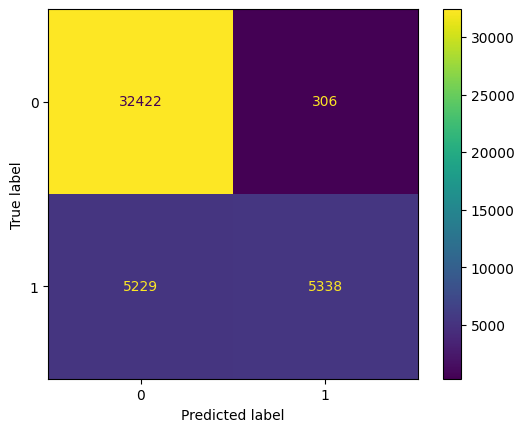

In [61]:
dt_classifier = GradientBoostingClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

### Accuracy 

Точність класифікації (Classification Accuracy) — це те, що зазвичай мається на увазі, коли ми використовуємо термін "точність". Це співвідношення кількості правильних прогнозів до загальної кількості вхідних зразків.

Це добре працює лише в тому випадку, якщо кількість зразків, що належать кожному класу, однакова. Наприклад, розглянемо ситуацію, коли у тренувальному наборі є 98% зразків класу A і 2% зразків класу B. Тоді наша модель може легко отримати 98% точності навчання, просто передбачаючи, що всі зразки належать до класу A.

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [63]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8423836470724102

### Precision

Це кількість правильних позитивних результатів, поділена на кількість позитивних результатів, передбачених класифікатором.

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score

In [65]:
dt_classifier = GradientBoostingClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
metrics.precision_score(y_test, y_pred)

c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9457831325301205

### Recall

Це кількість правильних позитивних результатів, поділена на кількість всіх релевантних зразків (усіх зразків, які мали бути визначені як позитивні).

In [66]:
from sklearn.metrics import recall_score

In [67]:
dt_classifier = GradientBoostingClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
metrics.recall_score(y_test, y_pred)

c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5051575660073815

### F1 Score

F1-оцінка (F1 Score) — це гармонічне середнє між точністю (precision) і повнотою (recall). Значення F1-оцінки знаходиться в діапазоні [0, 1]. Вона показує, наскільки точним є ваш класифікатор (скільки прикладів він класифікує правильно), а також наскільки він є стійким (тобто не пропускає значну кількість прикладів).

Висока точність, але низька повнота, дає вам дуже точний результат, проте він пропускає велику кількість прикладів, які важко класифікувати. Чим вища F1-оцінка, тим краща продуктивність нашої моделі. 

In [68]:
from sklearn.metrics import f1_score

In [69]:
dt_classifier = GradientBoostingClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
metrics.f1_score(y_test, y_pred)

c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.658565171796928

### Area Under Curve(AUC)

Площа під кривою (AUC) — це один з найбільш поширених показників для оцінки якості моделі. AUC використовується для задач двійкової класифікації. AUC класифікатора дорівнює ймовірності того, що класифікатор поставить випадково вибраний позитивний приклад вище, ніж випадково вибраний негативний приклад. 
Крива приймально-передавальної характеристики (ROC), або просто ROC-крива, є графічним зображенням, яке ілюструє продуктивність системи двійкової класифікації при зміні порогу розрізнення. Вона створюється шляхом побудови графіка, що показує відношення істинних позитивів серед позитивів (TPR = true positive rate) до відношення хибних позитивів серед негативів (FPR = false positive rate) при різних налаштуваннях порогу. T

In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [71]:
dt_classifier = GradientBoostingClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
roc_auc

0.747903886890271

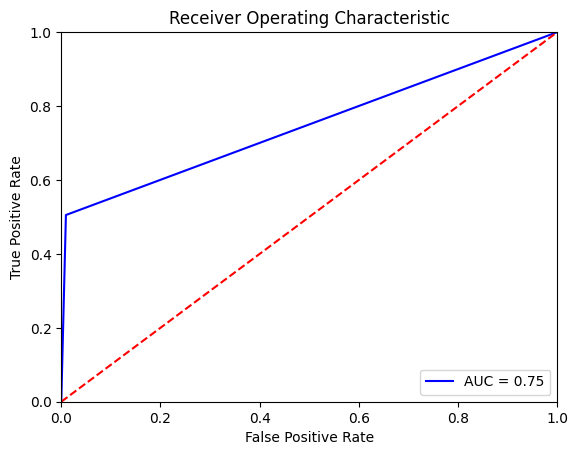

In [73]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### The classification_report function builds a text report showing the main classification metrics. 

In [74]:
dt_classifier = GradientBoostingClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.86      0.99      0.92     32728
           1       0.95      0.51      0.66     10567

    accuracy                           0.87     43295
   macro avg       0.90      0.75      0.79     43295
weighted avg       0.88      0.87      0.86     43295

